In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# read fastANI output
ani_df = pd.read_csv("../results/fastani_output.txt", sep="\t", header=None)
ani_df.columns = ["query", "reference", "ANI", "fragments_matched", "total_fragments"]
print("shape:",ani_df.shape)
ani_df

shape: (35094, 5)


,query,reference,ANI,fragments_matched,total_fragments
0,./data/all_fna/MAG133.fna,./data/all_fna/MAG133.fna,100.0000,121,121
1,./data/all_fna/MAG133.fna,./data/all_fna/MAG129.fna,82.0848,84,121
2,./data/all_fna/MAG127.fna,./data/all_fna/MAG127.fna,100.0000,348,350
3,./data/all_fna/MAG127.fna,./data/all_fna/MAG163.fna,77.9820,70,350
4,./data/all_fna/MAG084.fna,./data/all_fna/MAG084.fna,100.0000,239,242
...,...,...,...,...,...
35089,./data/all_fna/MAG116.fna,./data/all_fna/MAG022.fna,73.5482,65,939
35090,./data/all_fna/MAG116.fna,./data/all_fna/MAG202.fna,73.5231,153,939
35091,./data/all_fna/MAG116.fna,./data/all_fna/MAG062.fna,73.5159,106,939
35092,./data/all_fna/MAG116.fna,./data/all_fna/MAG009.fna,73.5157,148,939


## ANI analysis

In [2]:
# create ANI matirx
genomes = sorted(set(ani_df["query"]) | set(ani_df["reference"]))
ani_matrix = pd.DataFrame(np.ones((len(genomes), len(genomes))) * 10, index=genomes, columns=genomes)

for _, row in ani_df.iterrows():
    ani_matrix.loc[row["query"], row["reference"]] = row["ANI"]
    ani_matrix.loc[row["reference"], row["query"]] = row["ANI"]  

ani_matrix

,./data/all_fna/MAG001.fna,./data/all_fna/MAG002.fna,./data/all_fna/MAG003.fna,./data/all_fna/MAG004.fna,./data/all_fna/MAG005.fna,./data/all_fna/MAG006.fna,./data/all_fna/MAG007.fna,./data/all_fna/MAG008.fna,./data/all_fna/MAG009.fna,./data/all_fna/MAG010.fna,...,./data/all_fna/MAG231.fna,./data/all_fna/MAG232.fna,./data/all_fna/MAG233.fna,./data/all_fna/MAG234.fna,./data/all_fna/MAG235.fna,./data/all_fna/MAG236.fna,./data/all_fna/MAG237.fna,./data/all_fna/MAG238.fna,./data/all_fna/MAG239.fna,./data/all_fna/MAG240.fna
./data/all_fna/MAG001.fna,100.0000,73.6011,73.5648,73.7736,73.6288,73.6542,73.6371,10.0000,73.5736,73.5725,...,73.8498,73.5543,73.6286,73.7908,10.0000,73.5234,73.7352,73.6203,73.6300,73.6267
./data/all_fna/MAG002.fna,73.6011,99.9999,73.5654,73.5027,73.6019,73.7140,73.5145,73.5202,73.5700,73.6123,...,73.5603,73.6121,73.5564,73.6080,73.4906,73.8314,73.5451,73.6305,73.5139,73.5823
./data/all_fna/MAG003.fna,73.5648,73.5654,100.0000,73.5099,10.0000,73.5040,73.5000,10.0000,73.6648,10.0000,...,73.5446,73.6300,73.5644,73.4952,10.0000,73.5363,73.6132,73.5560,73.6609,73.5973
./data/all_fna/MAG004.fna,73.7736,73.5027,73.5099,100.0000,10.0000,73.6230,10.0000,10.0000,73.7128,10.0000,...,73.8459,73.7017,10.0000,73.8514,10.0000,73.5958,73.6148,10.0000,73.6873,73.6609
./data/all_fna/MAG005.fna,73.6288,73.6019,10.0000,10.0000,100.0000,10.0000,73.6317,73.9510,73.6363,78.0629,...,10.0000,10.0000,73.9594,10.0000,74.1930,10.0000,10.0000,76.4289,10.0000,10.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./data/all_fna/MAG236.fna,73.5234,73.8314,73.5363,73.5958,10.0000,73.7833,73.5594,10.0000,73.6351,10.0000,...,73.5663,73.6261,10.0000,73.6157,10.0000,100.0000,73.5561,10.0000,73.5645,73.6359
./data/all_fna/MAG237.fna,73.7352,73.5451,73.6132,73.6148,10.0000,73.5293,73.5851,10.0000,73.6219,10.0000,...,74.1002,73.6691,10.0000,74.0176,10.0000,73.5561,100.0000,10.0000,74.2497,73.5756
./data/all_fna/MAG238.fna,73.6203,73.6305,73.5560,10.0000,76.4289,10.0000,73.5132,74.5444,73.6431,76.6735,...,10.0000,10.0000,73.8610,10.0000,74.1012,10.0000,10.0000,100.0000,73.5645,10.0000
./data/all_fna/MAG239.fna,73.6300,73.5139,73.6609,73.6873,10.0000,73.5297,73.5684,10.0000,73.5220,10.0000,...,86.4185,73.8067,73.6177,83.3194,10.0000,73.5645,74.2497,73.5645,100.0000,73.7517


In [3]:
ani_matrix.index = ani_matrix.index.str.extract(r'(MAG\d+)', expand=False)
ani_matrix.columns = ani_matrix.columns.str.extract(r'(MAG\d+)', expand=False)
ani_matrix

,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
MAG001,100.0000,73.6011,73.5648,73.7736,73.6288,73.6542,73.6371,10.0000,73.5736,73.5725,...,73.8498,73.5543,73.6286,73.7908,10.0000,73.5234,73.7352,73.6203,73.6300,73.6267
MAG002,73.6011,99.9999,73.5654,73.5027,73.6019,73.7140,73.5145,73.5202,73.5700,73.6123,...,73.5603,73.6121,73.5564,73.6080,73.4906,73.8314,73.5451,73.6305,73.5139,73.5823
MAG003,73.5648,73.5654,100.0000,73.5099,10.0000,73.5040,73.5000,10.0000,73.6648,10.0000,...,73.5446,73.6300,73.5644,73.4952,10.0000,73.5363,73.6132,73.5560,73.6609,73.5973
MAG004,73.7736,73.5027,73.5099,100.0000,10.0000,73.6230,10.0000,10.0000,73.7128,10.0000,...,73.8459,73.7017,10.0000,73.8514,10.0000,73.5958,73.6148,10.0000,73.6873,73.6609
MAG005,73.6288,73.6019,10.0000,10.0000,100.0000,10.0000,73.6317,73.9510,73.6363,78.0629,...,10.0000,10.0000,73.9594,10.0000,74.1930,10.0000,10.0000,76.4289,10.0000,10.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG236,73.5234,73.8314,73.5363,73.5958,10.0000,73.7833,73.5594,10.0000,73.6351,10.0000,...,73.5663,73.6261,10.0000,73.6157,10.0000,100.0000,73.5561,10.0000,73.5645,73.6359
MAG237,73.7352,73.5451,73.6132,73.6148,10.0000,73.5293,73.5851,10.0000,73.6219,10.0000,...,74.1002,73.6691,10.0000,74.0176,10.0000,73.5561,100.0000,10.0000,74.2497,73.5756
MAG238,73.6203,73.6305,73.5560,10.0000,76.4289,10.0000,73.5132,74.5444,73.6431,76.6735,...,10.0000,10.0000,73.8610,10.0000,74.1012,10.0000,10.0000,100.0000,73.5645,10.0000
MAG239,73.6300,73.5139,73.6609,73.6873,10.0000,73.5297,73.5684,10.0000,73.5220,10.0000,...,86.4185,73.8067,73.6177,83.3194,10.0000,73.5645,74.2497,73.5645,100.0000,73.7517


In [4]:
# Calculate Distance Matrix & Clustering
dist_matrix = 1 - ani_matrix / 100
linkage_matrix = linkage(dist_matrix.fillna(1), method='average')

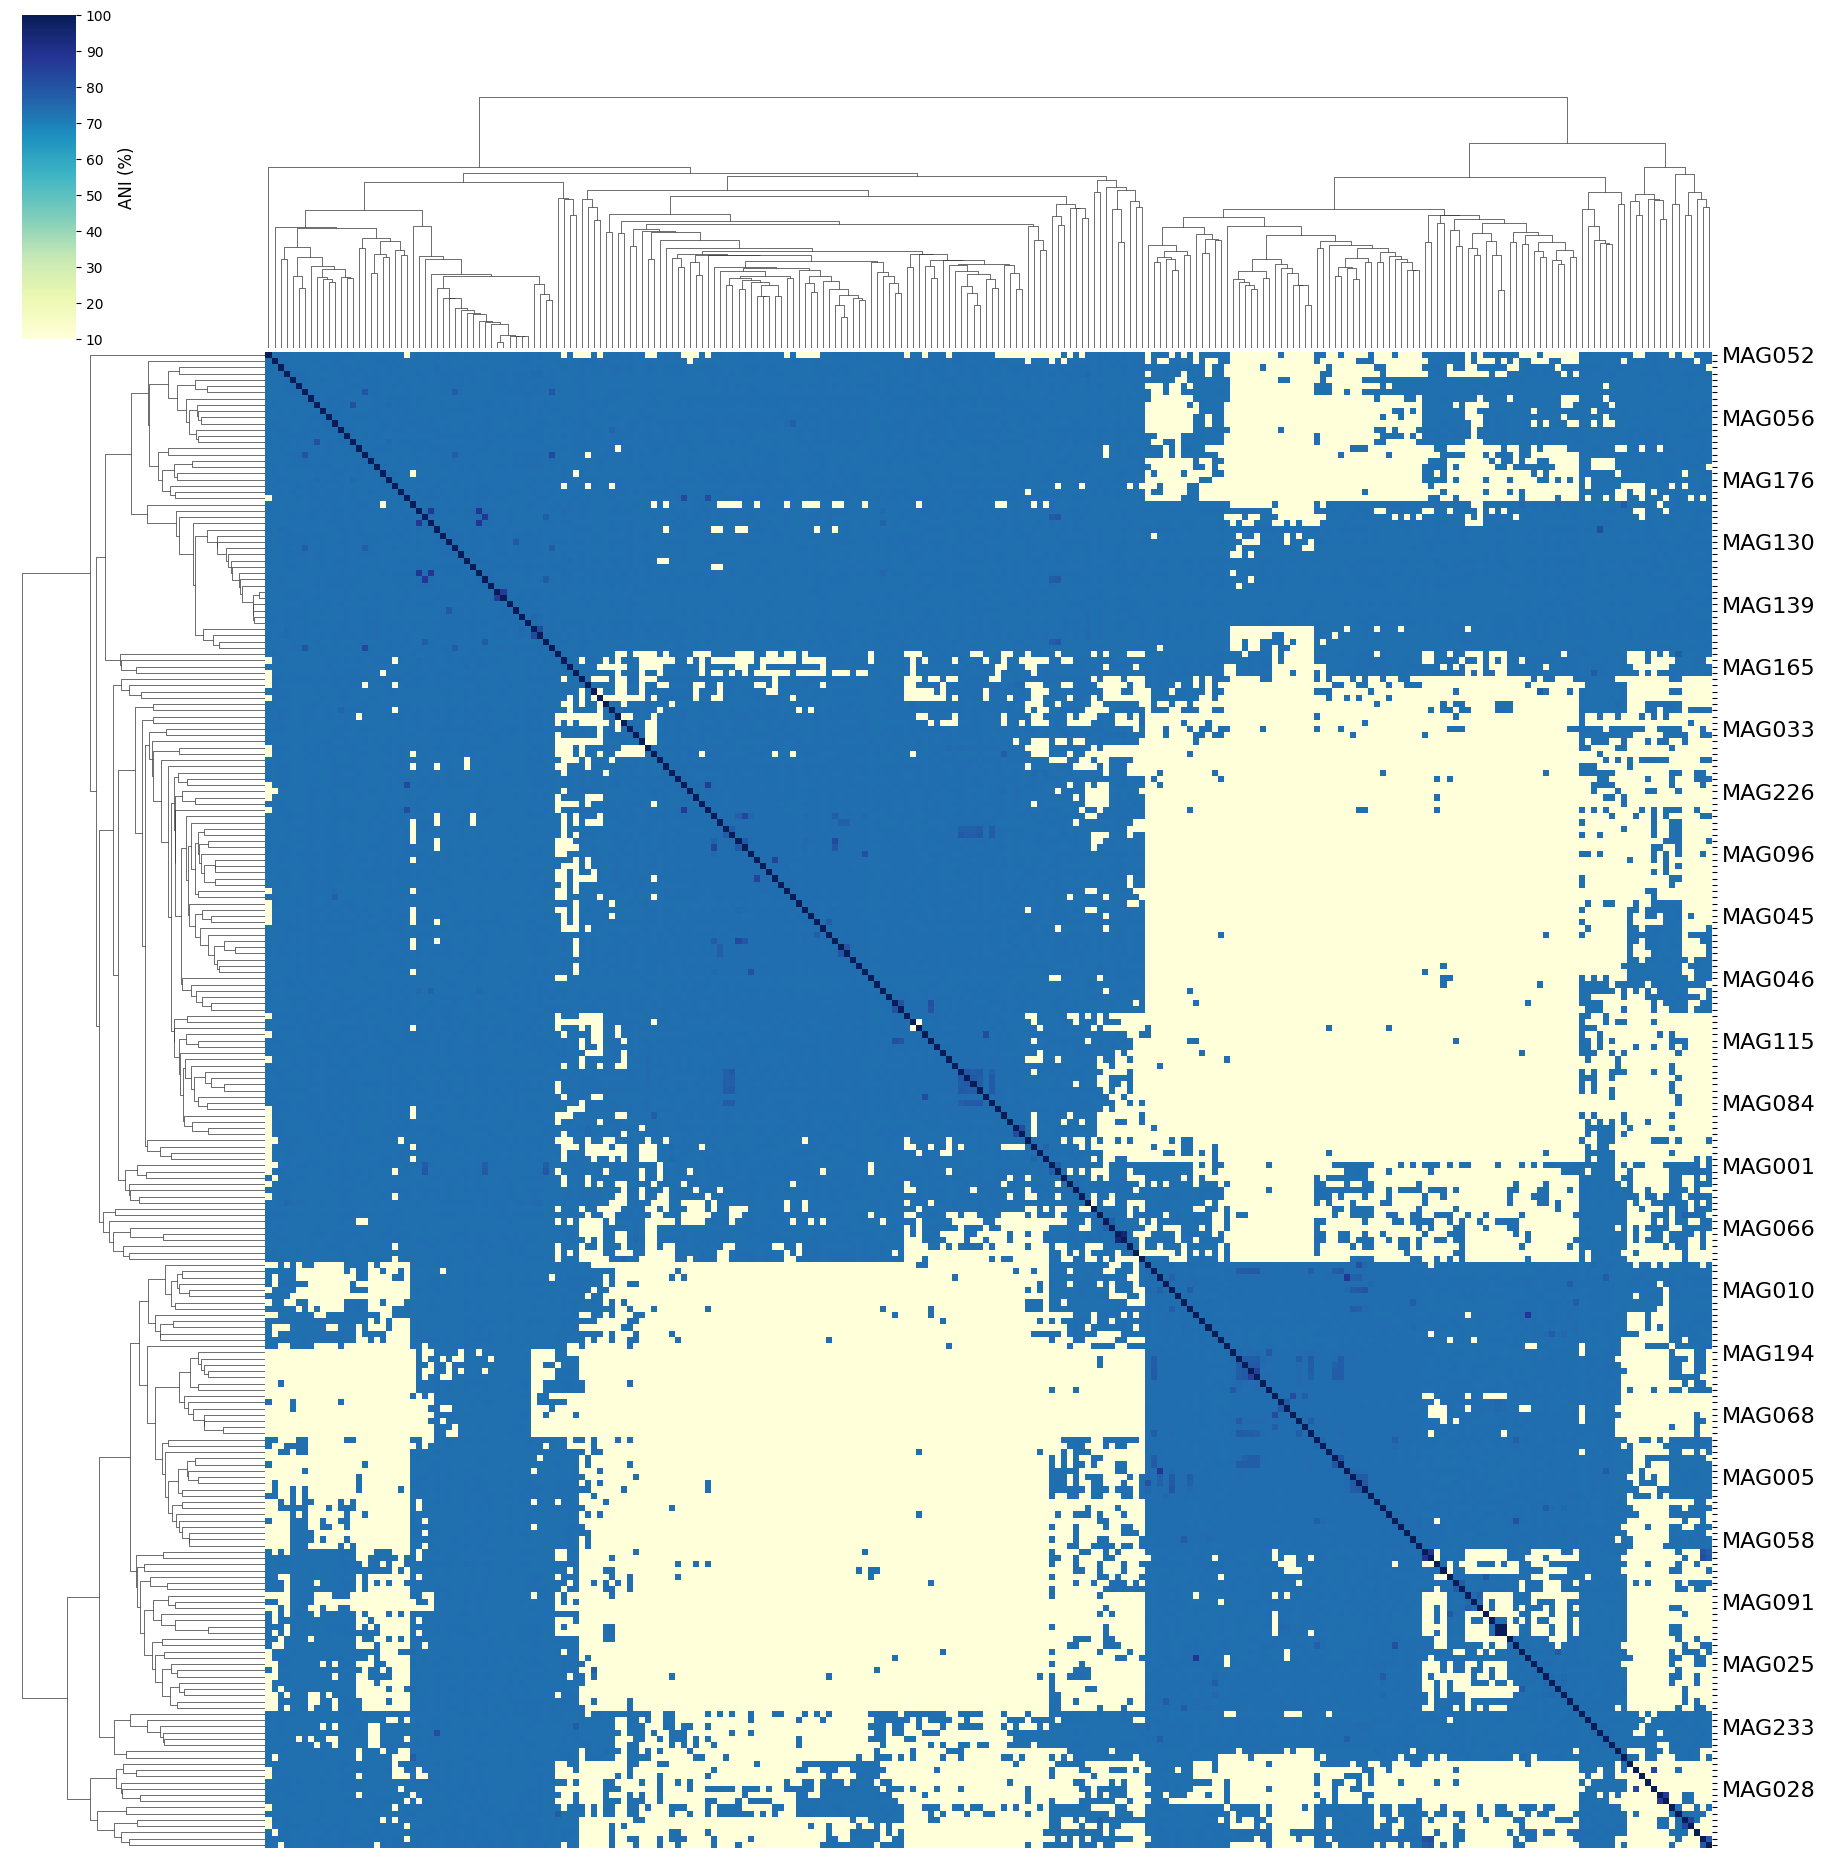

In [5]:
# plot
g = sns.clustermap(
    ani_matrix,
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="YlGnBu",  # "viridis", "coolwarm", "magma", "mako" 
    figsize=(18, 18),
    xticklabels=False,    
    yticklabels=True,
    cbar_kws={'label': 'ANI (%)'},
    dendrogram_ratio=(0.15, 0.15),
    cbar_pos=(0.015, 0.85, 0.03, 0.18)
)

#change cbar
colorbar = g.cax 
colorbar.tick_params(labelsize=10)  #  tick size
colorbar.yaxis.label.set_size(12) 

plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=16)
for i, label in enumerate(g.ax_heatmap.get_yticklabels()):
    if i % 10 != 0:
        label.set_visible(False)

## Nonlinear transformation distance/clustering

In [6]:
# transformation
# to make the color bar more informative 
eps = 1e-4
transformed_dist = -np.log((ani_matrix / 100).clip(lower=eps))
transformed_dist = transformed_dist.fillna(transformed_dist.max().max())
transformed_dist

,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,MAG010,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
MAG001,-0.000000,0.306510,0.307004,0.304169,0.306134,0.305789,0.306021,2.302585,0.306884,0.306899,...,0.303137,0.307146,0.306137,0.303936,2.302585,0.307566,0.304690,0.306249,0.306118,0.306162
MAG002,0.306510,0.000001,0.306995,0.307848,0.306499,0.304977,0.307688,0.307610,0.306933,0.306358,...,0.307065,0.306361,0.307118,0.306416,0.308013,0.303386,0.307271,0.306111,0.307696,0.306766
MAG003,0.307004,0.306995,-0.000000,0.307750,2.302585,0.307830,0.307885,2.302585,0.305645,2.302585,...,0.307278,0.306118,0.307009,0.307950,2.302585,0.307391,0.306346,0.307123,0.305698,0.306562
MAG004,0.304169,0.307848,0.307750,-0.000000,2.302585,0.306213,2.302585,2.302585,0.304994,2.302585,...,0.303190,0.305144,2.302585,0.303115,2.302585,0.306582,0.306324,2.302585,0.305340,0.305698
MAG005,0.306134,0.306499,2.302585,2.302585,-0.000000,2.302585,0.306095,0.301767,0.306032,0.247655,...,2.302585,2.302585,0.301654,2.302585,0.298500,2.302585,2.302585,0.268809,2.302585,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG236,0.307566,0.303386,0.307391,0.306582,2.302585,0.304038,0.307077,2.302585,0.306048,2.302585,...,0.306983,0.306171,2.302585,0.306312,2.302585,-0.000000,0.307122,2.302585,0.307008,0.306038
MAG237,0.304690,0.307271,0.306346,0.306324,2.302585,0.307486,0.306728,2.302585,0.306228,2.302585,...,0.299752,0.305587,2.302585,0.300867,2.302585,0.307122,-0.000000,2.302585,0.297736,0.306857
MAG238,0.306249,0.306111,0.307123,2.302585,0.268809,2.302585,0.307705,0.293775,0.305940,0.265614,...,2.302585,2.302585,0.302985,2.302585,0.299738,2.302585,2.302585,-0.000000,0.307008,2.302585
MAG239,0.306118,0.307696,0.305698,0.305340,2.302585,0.307481,0.306955,2.302585,0.307586,2.302585,...,0.145968,0.303721,0.306285,0.182489,2.302585,0.307008,0.297736,0.307008,-0.000000,0.304466


In [7]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 使用 transformed_dist（对数距离矩阵）转换为“相似度矩阵”
# → 相似度 = 1 / 距离（或用高斯核更平滑）
similarity_matrix = 1 / (transformed_dist + 1e-6)  # 加一点防止除0

# Spectral 聚类：划分 20 类
n_clusters = 20
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = sc.fit_predict(similarity_matrix)

# 整理结果
cluster_result = pd.DataFrame({
    'MAG': transformed_dist.index,
    'Cluster': labels
})

cluster_result.to_csv("../results/ani_20_clusters.csv", index=False)

cluster_result

,MAG,Cluster
0,MAG001,2
1,MAG002,5
2,MAG003,8
3,MAG004,2
4,MAG005,4
...,...,...
235,MAG236,17
236,MAG237,3
237,MAG238,4
238,MAG239,2


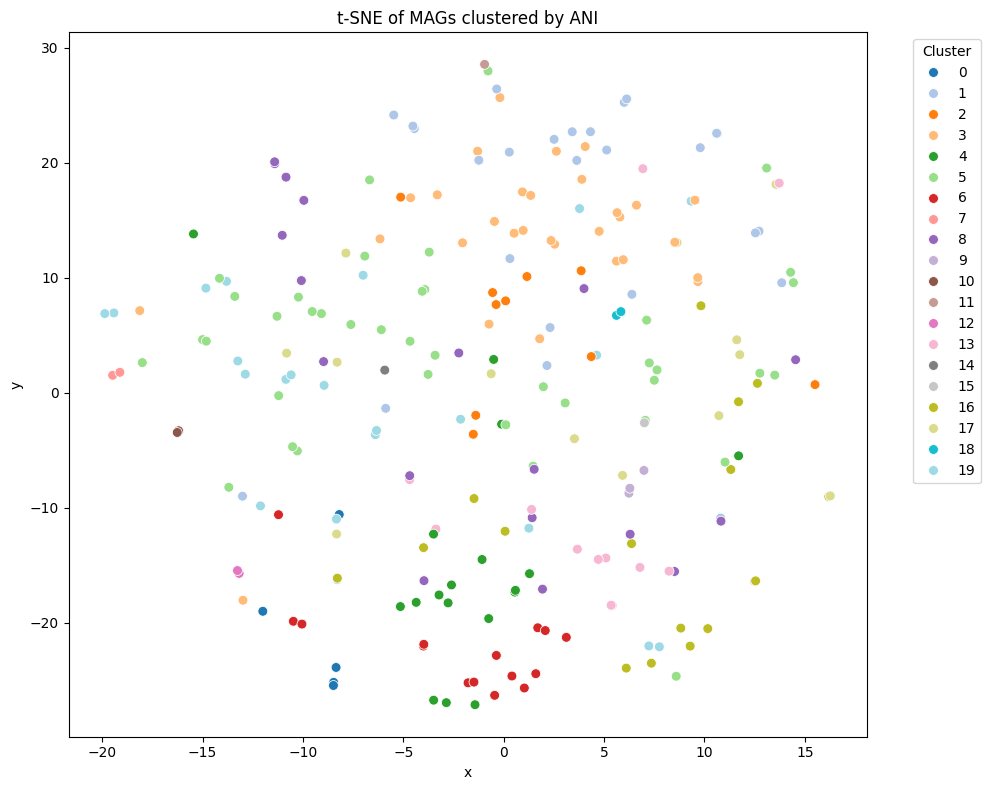

In [8]:
from sklearn.manifold import TSNE

embedding = TSNE(
    n_components=2,
    metric="precomputed",
    init="random",        
    random_state=42
).fit_transform(transformed_dist)

# add Cluster label
plot_df = pd.DataFrame({
    "x": embedding[:, 0],
    "y": embedding[:, 1],
    "Cluster": cluster_result.set_index("MAG").loc[transformed_dist.index]["Cluster"]
})

# plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x="x", y="y", hue="Cluster", palette="tab20", s=50)
plt.title("t-SNE of MAGs clustered by ANI")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.savefig("ani_tsne_clustered.png", dpi=300)
plt.show()

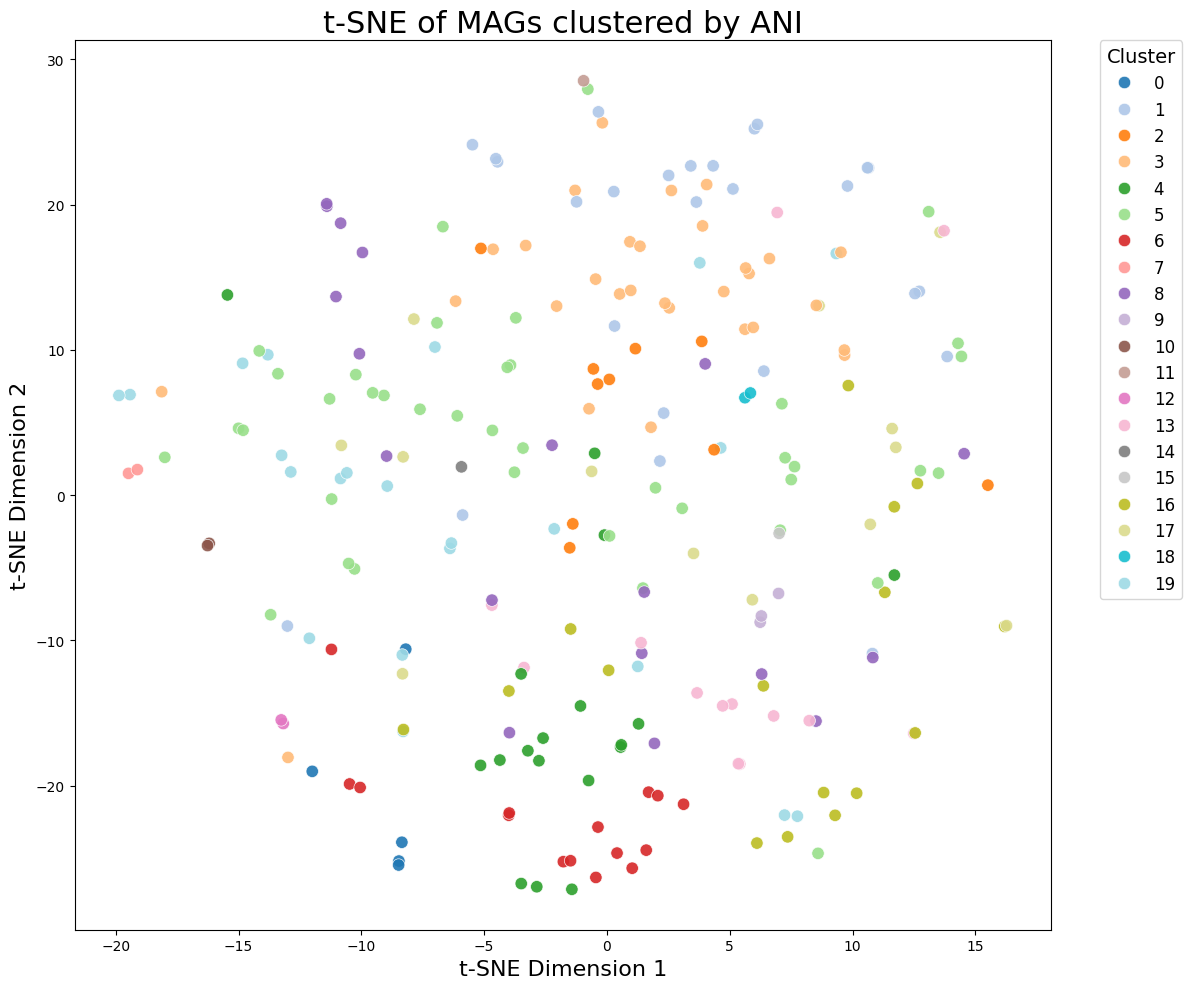

In [9]:
from sklearn.manifold import TSNE

# 1. t-SNE 
embedding = TSNE(
    n_components=2,
    metric="precomputed",
    init="random",        
    random_state=42
).fit_transform(transformed_dist)

# 2. DataFrame
plot_df = pd.DataFrame({
    "x": embedding[:, 0],
    "y": embedding[:, 1],
    "Cluster": cluster_result.set_index("MAG").loc[transformed_dist.index]["Cluster"]
})

# 3. plot
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=plot_df,
    x="x", y="y",
    hue="Cluster",
    palette="tab20",
    s=80,
    edgecolor='white',
    linewidth=0.5,
    alpha=0.9
)

# 4. label and title
plt.title("t-SNE of MAGs clustered by ANI", fontsize=22)
plt.xlabel("t-SNE Dimension 1", fontsize=16)
plt.ylabel("t-SNE Dimension 2", fontsize=16)

# 5. legend
plt.legend(
    title="Cluster",
    title_fontsize=14,
    fontsize=12,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# 6. adjust layout
plt.tight_layout()
#plt.savefig("ani_tsne_clustered_nice.png", dpi=300)
plt.show()
